## Feature engineering

### Importación de librerías

Datos y gráficos

In [163]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

### Warnings y display de la dataframe

In [164]:
pd.set_option("max_colwidth", 50)
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 20)

In [165]:
import warnings

warnings.filterwarnings("ignore")

### Importación de dataframes

In [166]:
directorio_actual = os.getcwd()

In [167]:
df = pd.read_csv(os.path.join(directorio_actual, '..', 'data','raw','df_total_venta.csv'))
df = df.drop(['Unnamed: 0'], axis=1)
df_pob_distr = pd.read_csv(os.path.join(directorio_actual, '..', 'data','processed','df_pob_distr.csv'))

### Tratamiento de dataframe

Eliminación de columnas irrelevantes

In [168]:
df = df.drop(['thumbnail','numPhotos','operation','province','has360','country','url','hasVideo','hasPlan','has3DTour','hasStaging','externalReference','labels','newDevelopmentFinished','highlight'],axis=1)
df = df.drop(['topNewDevelopment','superTopHighlight'], axis=1)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   propertyCode    1700 non-null   int64  
 1   price           1700 non-null   float64
 2   propertyType    1700 non-null   object 
 3   size            1700 non-null   float64
 4   rooms           1700 non-null   int64  
 5   bathrooms       1700 non-null   int64  
 6   address         1700 non-null   object 
 7   municipality    1700 non-null   object 
 8   district        1410 non-null   object 
 9   latitude        1700 non-null   float64
 10  longitude       1700 non-null   float64
 11  showAddress     1700 non-null   bool   
 12  distance        1700 non-null   int64  
 13  description     1692 non-null   object 
 14  status          1700 non-null   object 
 15  newDevelopment  1700 non-null   bool   
 16  parkingSpace    672 non-null    object 
 17  priceByArea     1700 non-null   f

Eliminación de registros con anomalías

In [170]:
df = df[df['priceByArea'] >= 500]

In [171]:
df[['priceByArea','price','size','status','municipality','description','district','propertyType']].sort_values(by='priceByArea',ascending=False).head()

,priceByArea,price,size,status,municipality,description,district,propertyType
976,6653.0,499000.0,75.0,good,Sevilla,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALI...,Centro,flat
1017,6630.0,895000.0,135.0,good,Sevilla,Este exclusivo y luminoso piso se encuentra en...,Nervión,flat
989,6544.0,890000.0,136.0,good,Sevilla,¡Bienvenidos a este exclusivo piso de lujo en ...,Centro,flat
243,6376.0,1900000.0,298.0,renew,Sevilla,NO COBRAMOS COMISIÓN AL COMPRADOR ESPECIALI...,Los Remedios,flat
386,6372.0,720000.0,113.0,good,Sevilla,¡Bienvenido al lujo en pleno corazón de Nervió...,Nervión,flat


In [172]:
df = df.drop([502,726])

In [173]:
'''Reinicio de índices para no tener problema con las llamadas'''
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

Creación de nuevas columnas

In [174]:
'''Aquí vemos las opciones de parking que hay por lo que 
nos quedaremos únicamente con si están o no incluido en el precio
'''
df['parkingSpace'].unique()

array(["{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",
       nan,
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 36000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 37000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 20000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 75000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 23000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 3000.0}",
       "{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice':

In [175]:
'''Creo una columna binaria de parking donde 0, es que no hay parking incluido en el precio
y 1, el parking está incluido en el precio.
Habrá un 0 por defecto.
'''
df['parking'] = 0

In [176]:
'''Completo los valores null con 0, diciendo así que no hay parking
'''
df['parkingSpace'] = df['parkingSpace'].fillna(0)

In [177]:
'''Bucle for donde si el valor no es 0, creo una variable en la que convierto el diccionario dentro de parkingSpace,
en una string, para poder preguntarle, que si no contiene un False, me ponga un 1 en la columna parking'''
for i, dicc in enumerate(df['parkingSpace']):
    if dicc != 0:
        string = str(dicc)
        if 'False' not in string:
            df['parking'][i] = 1

In [178]:
'''Completo los valores sin distrito (Nan), con el mismo municipio'''
df['district'].fillna(df['municipality'],inplace=True)

In [179]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1660 entries, 0 to 1659
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   propertyCode    1660 non-null   int64  
 1   price           1660 non-null   float64
 2   propertyType    1660 non-null   object 
 3   size            1660 non-null   float64
 4   rooms           1660 non-null   int64  
 5   bathrooms       1660 non-null   int64  
 6   address         1660 non-null   object 
 7   municipality    1660 non-null   object 
 8   district        1660 non-null   object 
 9   latitude        1660 non-null   float64
 10  longitude       1660 non-null   float64
 11  showAddress     1660 non-null   bool   
 12  distance        1660 non-null   int64  
 13  description     1652 non-null   object 
 14  status          1660 non-null   object 
 15  newDevelopment  1660 non-null   bool   
 16  parkingSpace    1660 non-null   object 
 17  priceByArea     1660 non-null   f

In [180]:
'''Creo una df agrupada por municipios y dentro de estos, por distritos.
Saco la media del precio/area según este agrupamiento.
Codifico cada minicipio/distrito de menor a mayor según la media del precio/area
Creo una columna con el municipio y su distrito'''
grupo_ciudad_distrito = df.groupby(['municipality','district'],as_index=False)['priceByArea'].agg(['mean'])
grupo_ciudad_distrito = grupo_ciudad_distrito.sort_values(by='mean',ascending=True)
grupo_ciudad_distrito = grupo_ciudad_distrito.reset_index()
grupo_ciudad_distrito = grupo_ciudad_distrito.reset_index()
grupo_ciudad_distrito.drop(['index'],axis=1,inplace=True)
grupo_ciudad_distrito['level_0'] = grupo_ciudad_distrito['level_0']+1
grupo_ciudad_distrito.rename(columns={'level_0':'codigo_distrito'},inplace=True)
grupo_ciudad_distrito['poblacion / distrito'] = grupo_ciudad_distrito['municipality'] + ' / ' + grupo_ciudad_distrito['district']

In [181]:
df_pob_distr

,codigo_distrito,municipality,district,mean,poblacion / distrito
0,1,Salteras,Salteras,4.000000,Salteras / Salteras
1,2,Mairena del Aljarafe,Cavaleri,5.500000,Mairena del Aljarafe / Cavaleri
2,3,Alcalá de Guadaira,Oromana,5.666667,Alcalá de Guadaira / Oromana
3,4,Santiponce,Santiponce,6.000000,Santiponce / Santiponce
4,5,Utrera,Pedanías Norte,6.000000,Utrera / Pedanías Norte
...,...,...,...,...,...
65,66,Sevilla,Triana,12.945652,Sevilla / Triana
66,67,Tomares,Centro,13.000000,Tomares / Centro
67,68,Dos Hermanas,La Motilla - Fuente del Rey,13.000000,Dos Hermanas / La Motilla - Fuente del Rey
68,69,Sevilla,Centro,13.583710,Sevilla / Centro


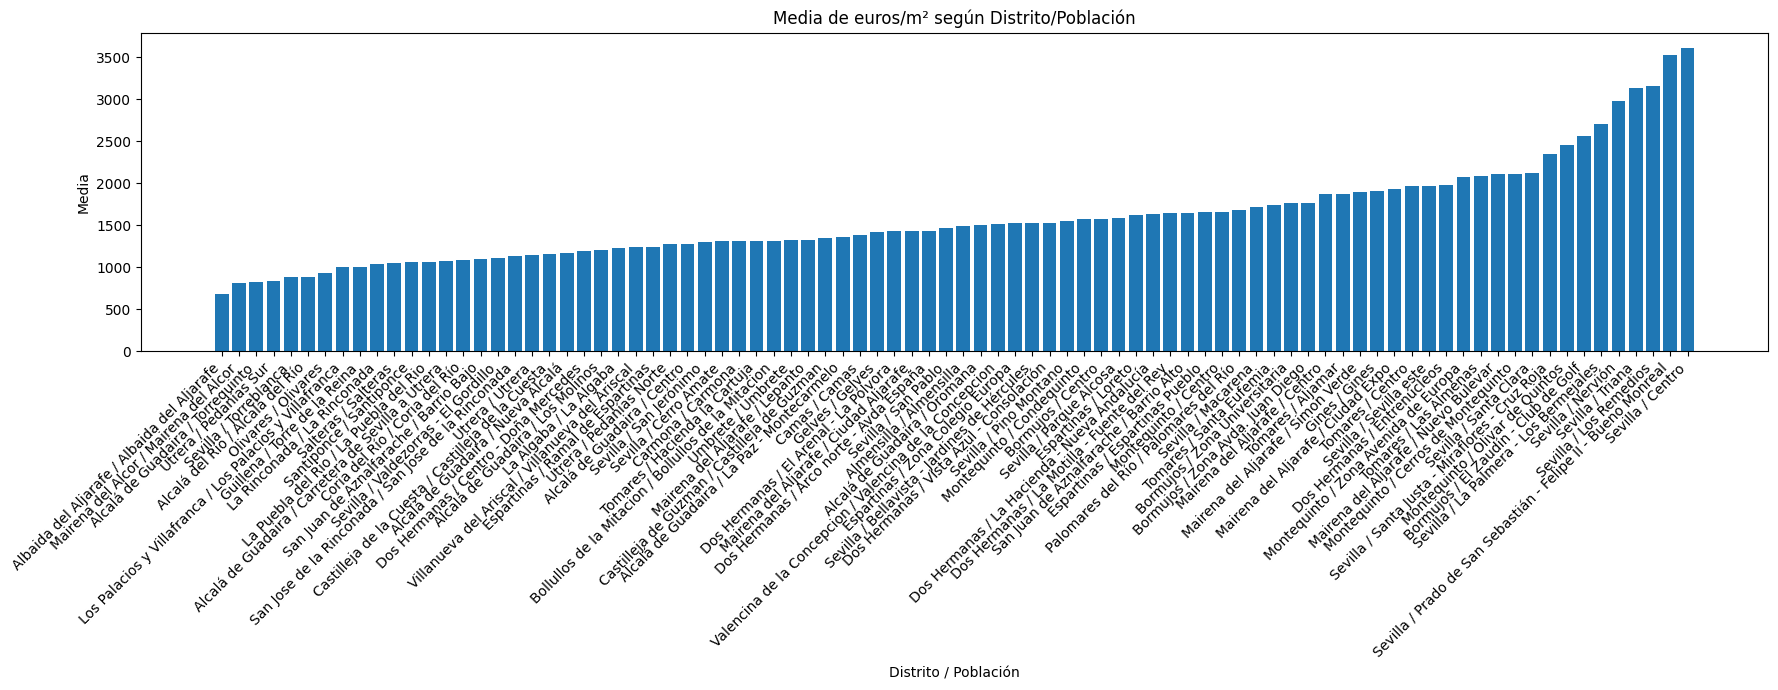

In [182]:
plt.figure(figsize=(18, 7))
plt.bar(grupo_ciudad_distrito['poblacion / distrito'], grupo_ciudad_distrito['mean'])
plt.xticks(rotation=45, ha='right')
plt.xlabel('Distrito / Población')
plt.ylabel('Media')
plt.title('Media de euros/m\u00B2 según Distrito/Población')

plt.tight_layout()

In [186]:
'''Añado las 3 categorias creadas a nuestra dataframe con un valor por defecto de 0'''
df['codigo_distrito'] = 0
df['poblacion / distrito'] = 0
df['precio_area / distrito'] = 0

In [187]:
'''Mediante un bucle for, voy recorriendo nuestra dataframe
y comparándola con la agrupada para añadir después los valores que correspondan
en cada columna creada'''
for i, municipio in enumerate(df['municipality']):
    if df['codigo_distrito'][i] == 0:
        for n, municipio_group in enumerate(grupo_ciudad_distrito['municipality']):
            if municipio_group == municipio:
                for w, distrito in enumerate(df['district']):
                    if w == i:
                        for p, distrito_group in enumerate(grupo_ciudad_distrito['district']):
                            if distrito_group == distrito and grupo_ciudad_distrito['municipality'][p] == municipio:
                                df['codigo_distrito'][i] = grupo_ciudad_distrito['codigo_distrito'][p]
                                df['poblacion / distrito'][i] = grupo_ciudad_distrito['poblacion / distrito'][p]
                                df['precio_area / distrito'][i] = grupo_ciudad_distrito['mean'][p]  

In [197]:
df = df[df['poblacion / distrito'].isin(df_pob_distr['poblacion / distrito'])]

In [199]:
df.drop(['codigo_distrito'],axis=1,inplace=True)

In [200]:
df['codigo_distrito'] = df['poblacion / distrito'].map(df_pob_distr.set_index('poblacion / distrito')['codigo_distrito'])

In [203]:
df['codigo_distrito'].unique()

array([ 7, 60, 62, 59, 70, 52, 25, 21, 57, 38, 54, 55, 27, 31, 34, 53, 56,
       28, 51, 69, 66, 44, 33, 37, 14, 65, 24, 11,  8, 19,  3, 39, 47, 16,
       43, 18, 26, 32, 46, 48, 22, 40, 50, 36, 30, 17, 15,  9, 45, 23, 61,
       10, 20, 35, 29,  4, 12, 68,  1, 13, 49, 42, 58, 64, 41, 67,  5,  6],
      dtype=int64)

In [232]:
'''Reinicio de índices para no tener problema con las llamadas'''
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [233]:
'''creamos columna para codificar el tipo de casa,
los códigos son asignados por la medias de sus precios de menor a mayor
- Estudio : 1
- Piso : 2
- Adosada : 3
- Duplex : 4
- Atico : 5
- Pareada : 6
- Independiente : 7
'''
df['codigo_tipo'] = 0

In [234]:
'''Mediante un bucle for, recorro todos los tipos de viviendas y le asigno el código correspondiente'''
for i, tipo in enumerate(df['detailedType']):
    variable = str(tipo)
    if variable == "{'typology': 'flat', 'subTypology': 'studio'}": 
        df['codigo_tipo'][i] = 1
    elif variable == "{'typology': 'flat'}": 
        df['codigo_tipo'][i] = 2
    elif variable == "{'typology': 'chalet', 'subTypology': 'terracedHouse'}": 
        df['codigo_tipo'][i] = 3
    elif variable == "{'typology': 'flat', 'subTypology': 'duplex'}": 
        df['codigo_tipo'][i] = 4
    elif variable == "{'typology': 'flat', 'subTypology': 'penthouse'}": 
        df['codigo_tipo'][i] = 5
    elif variable == "{'typology': 'chalet', 'subTypology': 'semidetachedHouse'}": 
        df['codigo_tipo'][i] = 6
    else: 
        df['codigo_tipo'][i] = 7

In [235]:
'''Ya que hay áticos en la categoría pisos,
busco en la descripciones, cual contiene la palabra ático, 
previeniendo cualquier error'''
for i, comment in enumerate(df['description']):
    if pd.notna(comment) and ('ático' in comment or 'atico' in comment or 'Ático' in comment or 'Atico' in comment):
        df['codigo_tipo'][i] = 5
   

In [236]:
grupo_tipo_vivienda = df.groupby(['codigo_tipo'],as_index=False)['price'].agg(['mean'])

In [237]:
grupo_tipo_vivienda

,codigo_tipo,mean
0,1,107887.500000
1,2,202045.160227
2,3,235291.264706
3,4,245754.827586
4,5,381075.452632
5,6,286711.926829
6,7,301667.029630


In [239]:
grupo_tipo_vivienda['tipo_vivienda'] = ['Estudio','Piso','Adosada','Duplex','Atico','Pareada','Independiente']

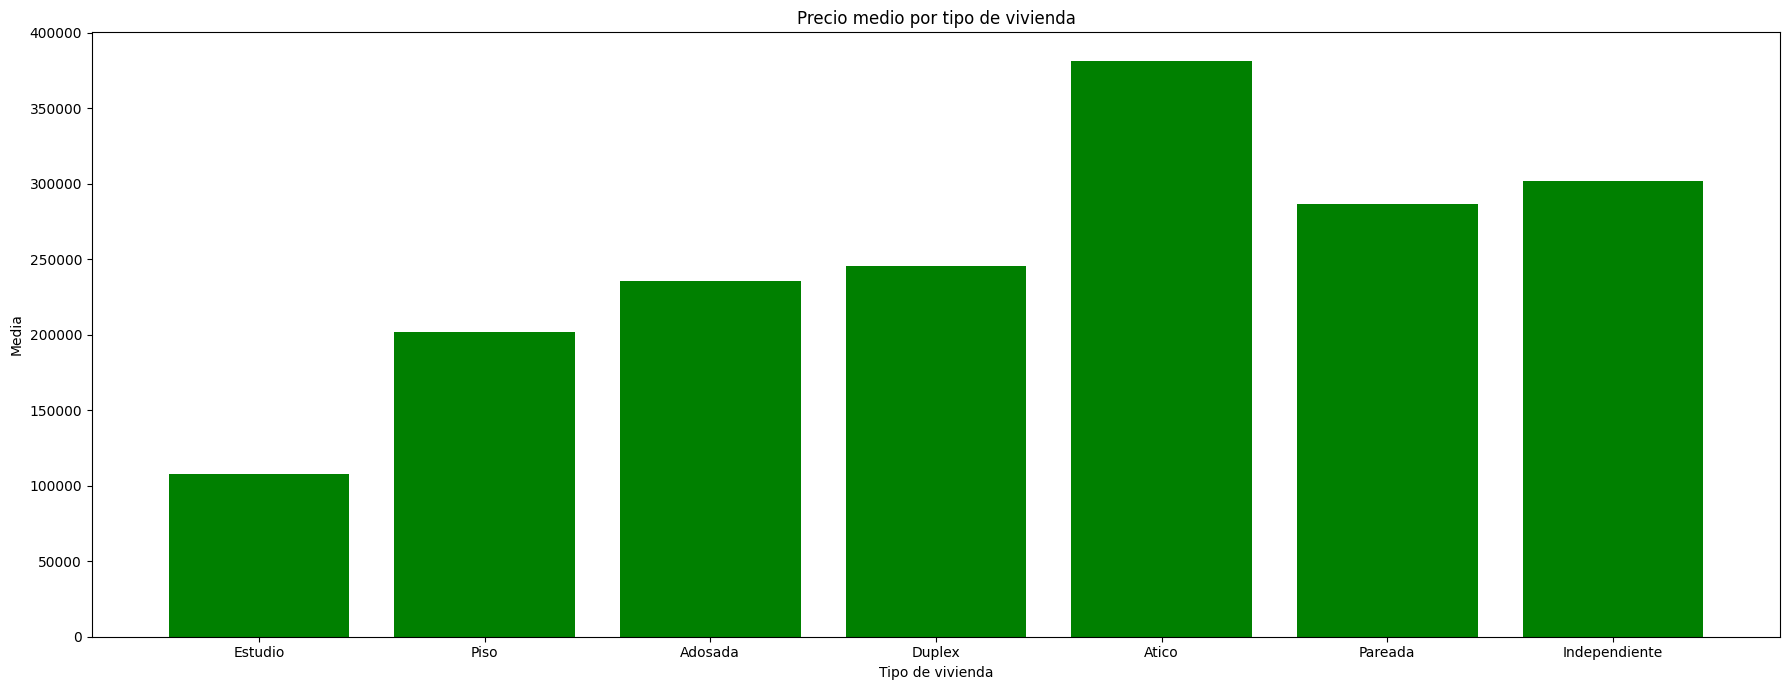

In [240]:
plt.figure(figsize=(18, 7))
plt.bar(grupo_tipo_vivienda['tipo_vivienda'], grupo_tipo_vivienda['mean'],color='green')
plt.xlabel('Tipo de vivienda')
plt.ylabel('Media')
plt.title('Precio medio por tipo de vivienda')
plt.tight_layout()

Podemos observar, que los áticos, son los que tienen la media de precio mas alta con diferencia. Eso se debe a la cantidad de áticos que hay en venta, por zonas céntricas, las cuales son mucho mas caras.

In [241]:
'''Compruebo las viviendas que tienen piscina.
Damos por hecho, que en los pisos, la piscina será común'''
df[(df['description'].notnull()) &  (df['description'].str.contains('piscina', case=False))].sort_values(by='price', ascending=False)

,propertyCode,price,propertyType,size,rooms,bathrooms,address,municipality,district,latitude,...,topPlus,floor,exterior,neighborhood,hasLift,parking,poblacion / distrito,precio_area / distrito,codigo_tipo,codigo_distrito
943,103160862,3350000.0,countryHouse,1750.0,9,9,Calle alcala,Valencina de la Concepcion,Valencina de la Concepcion,37.425288,...,False,NaN,NaN,NaN,NaN,1,Valencina de la Concepcion / Valencina de la C...,1512.666667,7,21
1124,103124980,1890000.0,chalet,631.0,7,7,El Zaudín - Club de Golf,Bormujos,El Zaudín - Club de Golf,37.366482,...,False,NaN,NaN,NaN,NaN,1,Bormujos / El Zaudín - Club de Golf,2569.500000,5,7
605,103211203,1800000.0,chalet,861.0,8,8,Calle Conde de Osborne,Sevilla,Santa Clara,37.402361,...,False,NaN,NaN,Santa Clara,NaN,1,Sevilla / Santa Clara,2123.857143,7,45
767,103185514,1780000.0,chalet,417.0,7,4,barrio Arenal - Museo - Tetuán,Sevilla,Centro,37.393624,...,False,NaN,NaN,Arenal - Museo - Tetuán,NaN,1,Sevilla / Centro,3612.091837,7,69
910,103167306,1500000.0,chalet,605.0,6,6,El Zaudín - Club de Golf,Bormujos,El Zaudín - Club de Golf,37.365703,...,False,NaN,NaN,NaN,NaN,1,Bormujos / El Zaudín - Club de Golf,2569.500000,7,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,103268743,83000.0,studio,45.0,0,1,barrio Alcalde L. Uruñuela - Palacio de Congresos,Sevilla,Sevilla este,37.407635,...,False,1,True,Alcalde L. Uruñuela - Palacio de Congresos,True,1,Sevilla / Sevilla este,1972.657895,1,55
1364,102909174,75000.0,flat,65.0,2,1,Calle Navío Argos,Sevilla,Cerro Amate,37.382854,...,False,3,NaN,Los Pajaritos,True,1,Sevilla / Cerro Amate,1311.310924,2,38
1236,102484387,70000.0,countryHouse,100.0,4,1,Urbanizacion LA ROMANA,Utrera,Pedanías Norte,37.183721,...,False,NaN,NaN,NaN,NaN,0,Utrera / Pedanías Norte,1271.705882,7,5
192,103266973,69000.0,chalet,91.0,2,1,"doctor fleming, 95",San Juan de Aznalfarache,Barrio Alto,37.360331,...,False,NaN,NaN,NaN,NaN,0,San Juan de Aznalfarache / Barrio Alto,1644.210526,3,50


In [242]:
'''Creo una función en la que compruebo si description,
contiene la palabra piscina.'''
def tiene_piscina(description):
    if pd.notna(description):  
        return 1 if 'piscina' in description.lower() else 0
    else:
        return 0

In [243]:
'''Creo la columna piscina y le aplico la función creada'''
df['piscina'] = df['description'].apply(tiene_piscina)

In [245]:
'''Compruebo que a las 346 viviendas le ha puesto 1'''
df['piscina'].value_counts()

piscina
0    1147
1     346
Name: count, dtype: int64

In [246]:
'''Al igual que en la función anterior,
en esta compruebo si existe la palabra amueblado(2) o sin amueblar(0)
si no existe, le adjudicaremos un 1'''
def amueblado(description):
    if pd.notna(description):  
        if 'amueblado' in description.lower():
            return 2 
        elif 'sin amueblar' in description.lower():
            return 0
        else:
            return 1
    else:
        return 1

In [247]:
'''Creo la columna muebles y le aplico la función creada'''
df['muebles'] = df['description'].apply(amueblado)

In [248]:
'''Compruebo que se ha realizado correctamente'''
df['muebles'].value_counts()

muebles
1    1424
2      48
0      21
Name: count, dtype: int64

In [249]:
'''Elimino columnas irrelevantes o que ya las he creado en otro formato.'''
df = df.drop(['municipality','address','district','showAddress','exterior','distance','suggestedTexts','neighborhood','floor','detailedType','newDevelopment','hasLift','parkingSpace'],axis=1)

In [258]:
'''Creo una dataframe solo con datos númericos'''
df_num_venta = df[['size','rooms','bathrooms','codigo_distrito','parking','price','codigo_tipo','piscina', 'muebles']]

In [259]:
'''Creo una columna, donde unifico los baños y habitaciones,
para así evitar la multicolinealidad'''
df_num_venta['total_rooms'] = df_num_venta['bathrooms'] + df_num_venta['rooms']
df_num_venta.drop(['rooms','bathrooms'],axis=1,inplace=True)

In [260]:
'''Código para pasar precio(target) al final, 
para así analizar mejor el siguiente diagrama'''
df_num_venta = df_num_venta[[col for col in df_num_venta.columns if col != 'price'] + ['price']]

<Axes: >

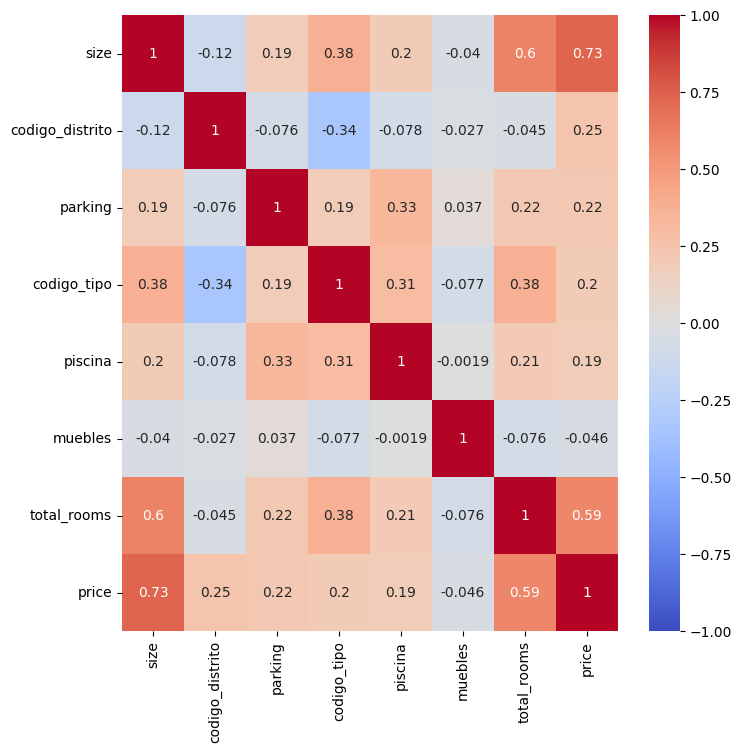

In [261]:
plt.figure(figsize=(8,8))
sns.heatmap(df_num_venta.corr(),annot=True,vmin=-1,cmap='coolwarm')

Aún se observa multicolinealidad entre total_rooms y size, pero son 2 atributos importantes y que además, no mejora mi modelo el hecho de quitar alguno.

Parece que la columna muebles no correla mucho y además, empeora mi modelo. Seguramente será por haber tantos registros sin determinar, por lo que procedo a eliminarla


In [262]:
df_num_venta.drop(['muebles'], axis=1, inplace=True)

<Figure size 800x800 with 0 Axes>

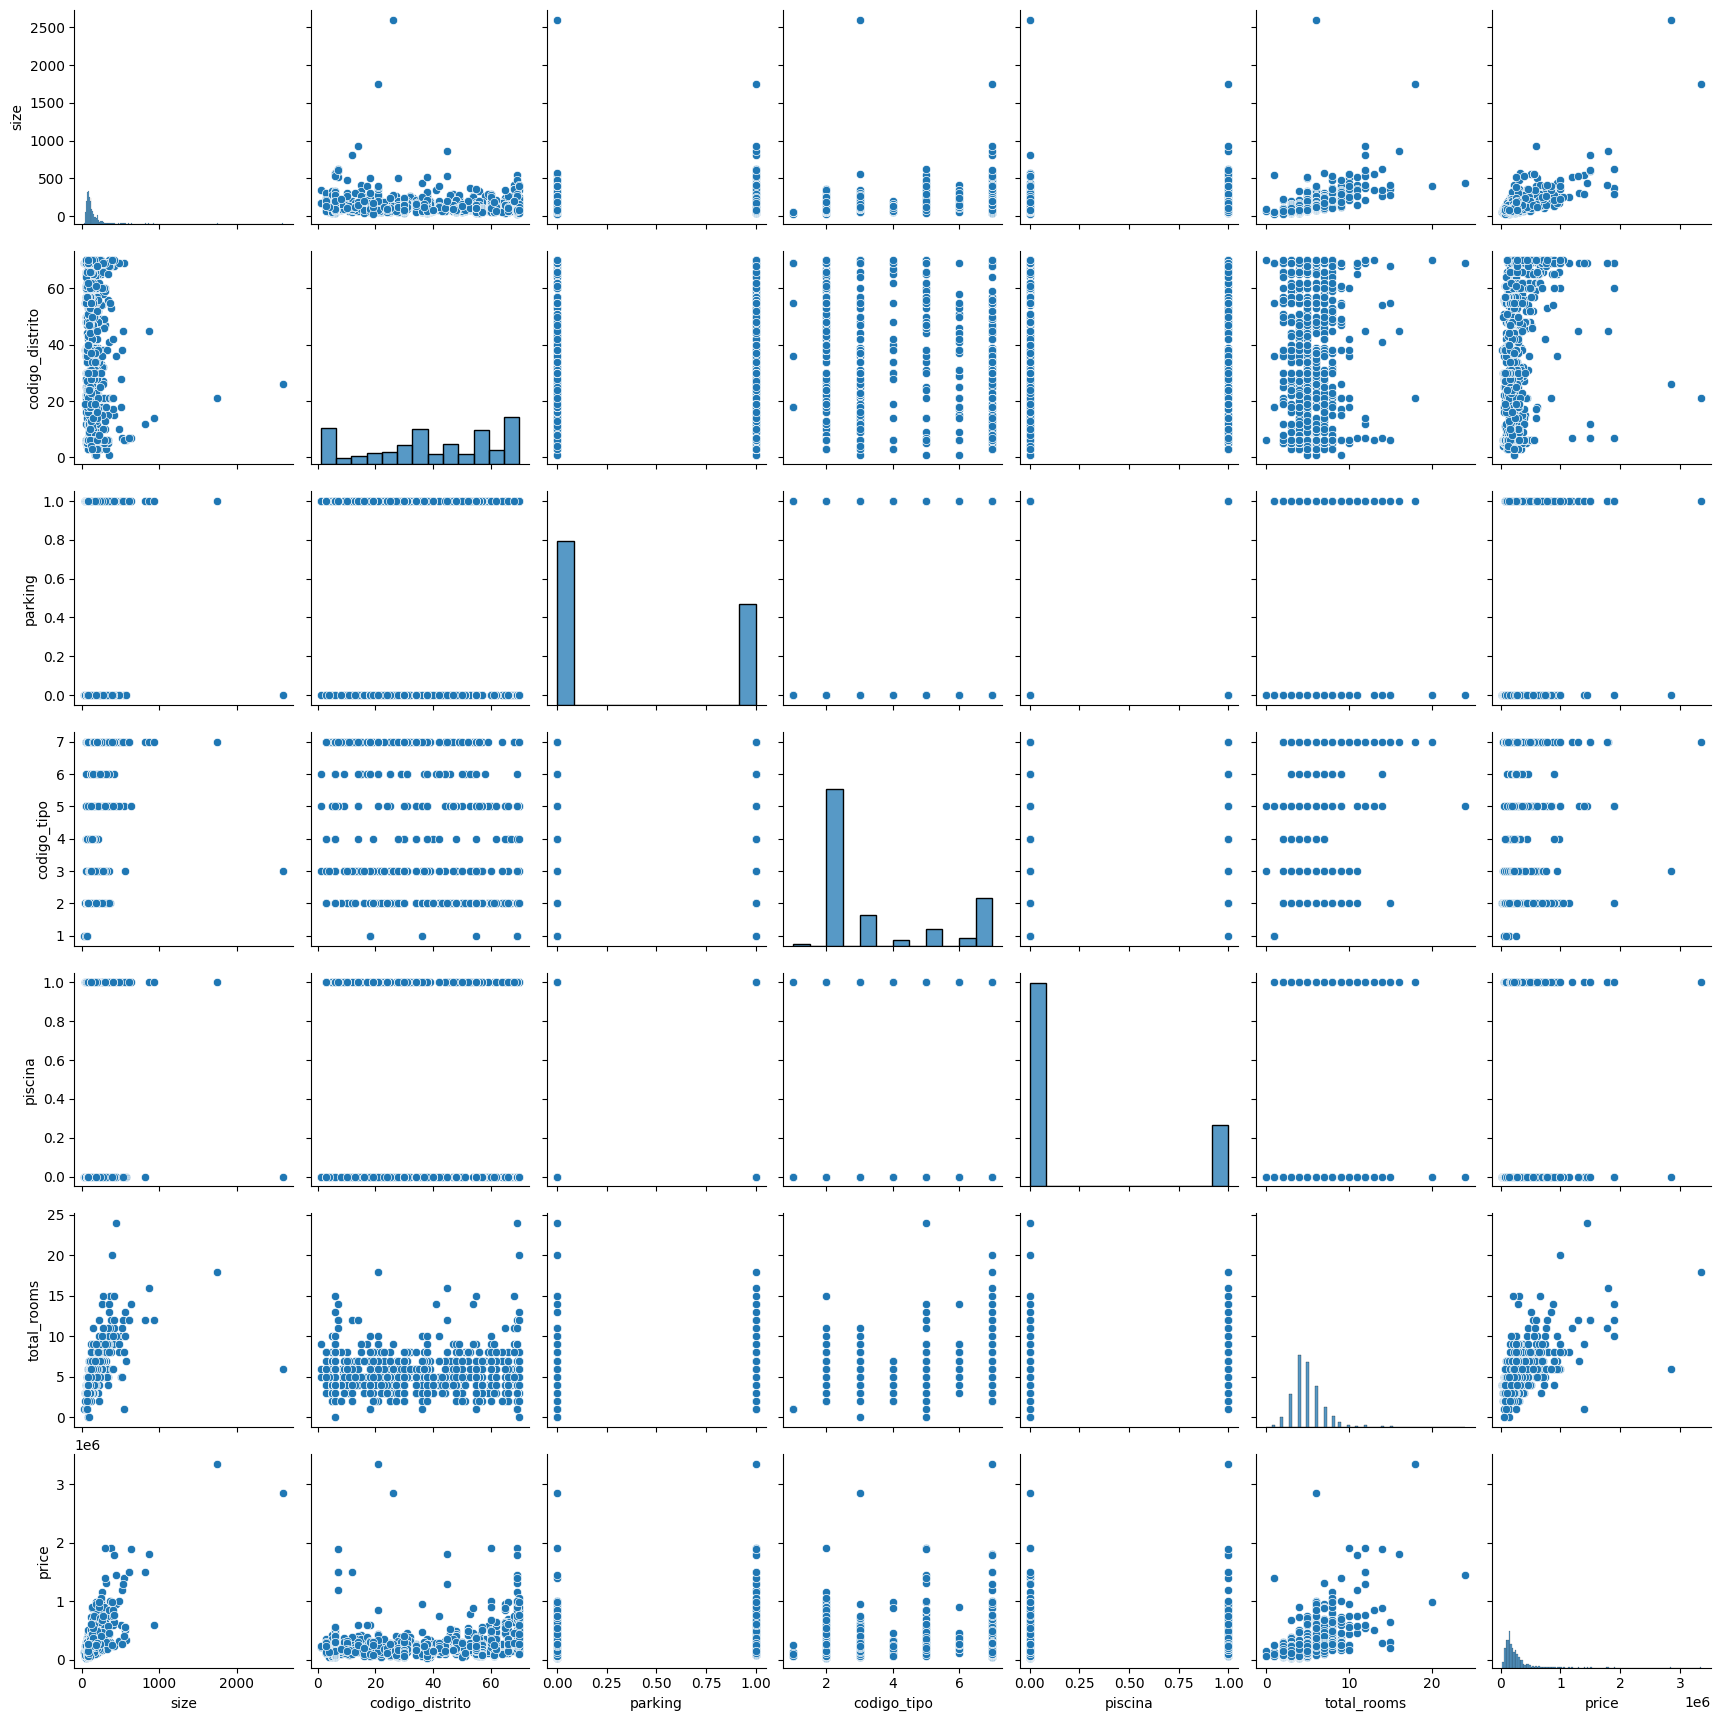

In [263]:
plt.figure(figsize=(8,8))
sns.pairplot(df_num_venta)

Cosas que observamos en este pairplot:
- Efectivamente, se observa correlación entre size y total_rooms, ya que a mas tamaño, mas habitaciones y baños tendremos
- Se observa que, la viviendas con parking, son ligeramente mas caras que las viviendas sin parking
- A priori, el codigo_distrito, parece no tener mucha correlación, ya que en cada distrito, hay viviendas de todo tipo, pero nos servirá para aproximarnos al precio según la localización de la vivienda.



### Split de las dataframe

In [256]:
from sklearn.model_selection import train_test_split

Creación de train y test

In [264]:
'''Una vez he terminado con el feature engineering,
divido la dataframe final en train y test entrenar y evaluar mi modelo.'''

df_train_venta, df_test_venta = train_test_split(df_num_venta,test_size=0.15,random_state=10)

### Exportación de dataframes

In [265]:
df.to_csv(os.path.join(directorio_actual, '..', 'data','processed','df_venta.csv'), index=False)
df_num_venta.to_csv(os.path.join(directorio_actual, '..', 'data','processed','df_num_venta.csv'), index=False)
df_train_venta.to_csv(os.path.join(directorio_actual, '..', 'data','train','df_train_venta.csv'), index=False)
df_test_venta.to_csv(os.path.join(directorio_actual, '..', 'data','test','df_test_venta.csv'), index=False)